# Práctica 07 - Diseño de controladores mediate el LGR
## Emmanuel Torres Sirangua


Importamos las librerías utilizadas

In [585]:
import control
import numpy as np
import matplotlib.pyplot as plt

## Función de transferencia en lazo abierto
### Ingresa la funcíon de transferencia, los parametros de diseño y seleciona el controlador a implementar

In [586]:
# La función de transferencia G(s) = C(s)/R(s). Defina los valores de C(s) y R(s)
# Define los coeficientes del polinomio en orden de potencia
cs = [100.7]
rs = [14,58,99,1] 

# Máximo sobre pico expresado en porcentaje 
Maximo_sobre_pico = 10 #%

# Tiempo de establecimietno en segundos
Tiempo_de_establecimiento = 20

# Controlador: P, I, PI, PD o PID
controlador = "PID"

In [587]:
# Se definen las funciones de transferencia del sistema
ft_la = control.TransferFunction(cs, rs)

print ("Tu función de transferencia en lazo abierto es: ",ft_la)

Tu función de transferencia en lazo abierto es:  
          100.7
--------------------------
14 s^3 + 58 s^2 + 99 s + 1



## Comportamiento de la función de transferencia
Considerado como entrada una entrada escalón unitario

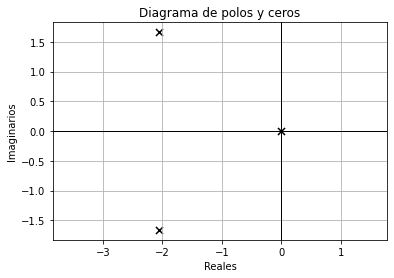

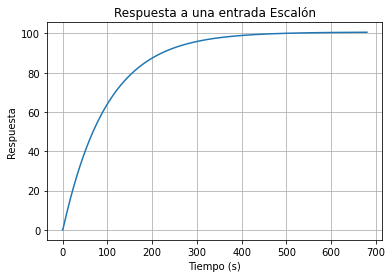

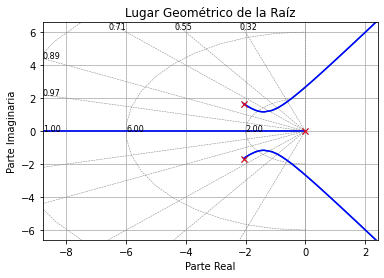

In [588]:
# Diagrama de polos y ceros
plt.figure(1)
control.pzmap (ft_la)
plt.grid("on")
plt.xlabel("Reales")
plt.ylabel("Imaginarios")
plt.title("Diagrama de polos y ceros")

# Respuesta a una entrada escalón
plt.figure(2)
t, y = control.step_response(ft_la)
plt.plot(t, y)
plt.grid("on")
plt.xlabel("Tiempo (s)")
plt.ylabel("Respuesta")
plt.title("Respuesta a una entrada Escalón")

# Lugar geométrico de la raíz
plt.figure(3)
rlocus_data, _ = control.rlocus(ft_la)
polos = control.pole(ft_la)
plt.plot(rlocus_data.real, rlocus_data.imag, "b", label="LGR")
plt.plot(polos.real, polos.imag, "rx", label="Polos")
plt.title("Lugar Geométrico de la Raíz")
plt.xlabel("Parte Real")
plt.ylabel("Parte Imaginaria")
plt.grid(True)



## Calcular los parametros de diseño 

Para poder definir los parametros se deben definir primero los valores de Máximo sobre pico y tiempo de establecimiento deseados en el sistema

In [589]:
# Calculo de polos dominantes
mp = Maximo_sobre_pico/100 # maximo sobre pico
fa = (np.log(mp))/(np.sqrt(np.square(np.pi)+(np.square(np.log(mp))))) # Factor de amortiguamiento
ts = Tiempo_de_establecimiento # Tiempo de establecimiento
wn = 4/(fa*ts) # Frecuencia natural 
wd = wn*(np.sqrt(1-np.square(fa))) # Frecuencia no amortiguada

pdd = complex (fa*wn,-wn*np.sqrt(1-np.square(fa))) #Polo dominante

print("El polo dominante es: ", -pdd.real, "+-", pdd.imag)

El polo dominante es:  -0.2 +- 0.27287527076836826


## Elegir ley de control

En base al controlador elegido se calcula la condición de fase considerando los polos y ceros agregados por el controlador



In [590]:
# Se obtienen los polos del sistema
polos = np.array(ft_la.pole())
ceros = np.array(ft_la.zeros ())

# Se agregan los polos y ceros que lleva según el controlador eleguido
if controlador == "P":
    print()
elif controlador == "I":
    polos = np.append(polos,complex(0,0)) # Controlador PI
elif controlador == "PI":
    polos = np.append(polos,complex(0,0)) # Controlador PI
elif controlador == "PD":
    print()
elif controlador == "PID":
    polos = np.append(polos,complex(0,0)) # Controlador PI
    ceros = np.append(ceros,complex(-1,0))
else: 
    print ("ADVERTENCIA: Controlador no valido")

In [591]:
# Calcular los angulos entre los polos y el polo dominante
teta = np.zeros(shape=(len(polos),))
fi = np.zeros(shape=(len(ceros),))
# Angulos teta
for i in range(len(polos)):
    if polos[i].imag >= 0:
        if polos[i].real >= -pdd.real:
            teta [i] = 180 - np.degrees(np.arctan (-(pdd.imag-polos[i].imag)/(-pdd.real-polos[i].real)))
            print ("El angunlo teta", i+1, " es: ", teta[i])
        else:
            teta [i] = np.degrees(np.arctan (-(pdd.imag-polos[i].imag)/(polos[i].real-(-pdd.real))))
            print ("El angunlo teta", i+1, " es: ", teta[i])

    else:
        if polos[i].real >= -pdd.real:
            teta [i] = 180 - np.degrees(np.arctan (-(pdd.imag-polos[i].imag)/(-pdd.real-polos[i].real)))
            print ("El angunlo teta", i+1, " es: ", teta[i])
        else:
            teta [i] = np.degrees(np.arctan (-(pdd.imag-polos[i].imag)/(polos[i].real-(-pdd.real))))
            print ("El angunlo teta", i+1, " es: ", teta[i])
# Angulos fi
for i in range(len(ceros)):
    if ceros[i].imag >= 0:
        if ceros[i].real >= -pdd.real:
            fi [i] = 180 - np.degrees(np.arctan (-(pdd.imag-ceros[i].imag)/(-pdd.real-ceros[i].real)))
            print ("El angunlo fi", i+1, " es: ", fi[i])
        else:
            fi [i] = np.degrees(np.arctan (-(pdd.imag-ceros[i].imag)/(ceros[i].real-(-pdd.real))))
            print ("El angunlo fi", i+1, " es: ", fi[i])
    else:
        if ceros[i].real >= -pdd.real:
            fi [i] = 180 - np.degrees(np.arctan ((-pdd.imag-ceros[i].imag)/(-pdd.real-ceros[i].real)))
            print ("El angunlo fi", i+1, " es: ", fi[i])
        else:
            fi [i] = np.degrees(np.arctan (-(pdd.imag+ceros[i].imag)/(ceros[i].real-(-pdd.real))))
            print ("El angunlo fi", i+1, " es: ", fi[i])
        
# Se calcula el angulo fi necesario para las constantes
fi_n = np.sum (teta) -np.sum(fi)- 180

print("El valor de fi que se busca es: ", fi_n)



El angunlo teta 1  es:  -36.64487349084
El angunlo teta 2  es:  46.02120882512043
El angunlo teta 3  es:  124.82623960123937
El angunlo teta 4  es:  126.23901581158754
El angunlo fi 1  es:  18.834205448694664
El valor de fi que se busca es:  61.60738529841268


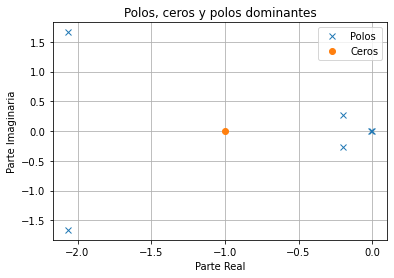

In [592]:
polos_gp = np.append(polos, -complex(pdd))
polos_gp = np.append(polos_gp, complex(-pdd.real,pdd.imag))
# Graficar los polos y ceros
plt.figure()
plt.plot(polos_gp.real, polos_gp.imag, "x", label="Polos")
plt.plot(ceros.real,ceros.imag, "o", label="Ceros")
plt.xlabel("Parte Real")
plt.ylabel("Parte Imaginaria")
plt.title("Polos, ceros y polos dominantes")
plt.legend()
plt.grid(True)
plt.show()



In [593]:
# Se calculan las constantes y función de transferencia para el controlador
if controlador == "P":
    # Para un controlador P, NO requiere calculos de condición de fase
    kp = 2/mp # A medida que al Máximo sobre pico aumenta, la ganancia proporcional disminuye
    print ("kp = ",kp)
    ft_c = control.TransferFunction ([kp], [1])
    print ("La función de transferencia del controlador es: ",ft_c)

elif controlador == "I":
    # Para un controlador I, NO requiere calculos de condición de fase
    kp = 2/mp # A medida que al Máximo sobre pico aumenta, la ganancia proporcional disminuye
    ft_c = control.TransferFunction ([kp], [1,0])
    print ("La función de transferencia del controlador es: ",ft_c)

elif controlador == "PI":
    # Para un controlador PI
    x = ((pdd.imag)/(np.tan((np.pi-fi_n)*np.pi/180)))-(pdd.real)
    ti = 1/x
    Gc_pi = control.TransferFunction([1,-x], [1,0])
    s = complex(pdd.real, pdd.imag)
    kp = 1 / abs(control.evalfr(Gc_pi,s) * control.evalfr(ft_la ,s))  
    ft_c = kp*Gc_pi
    print (x)
    print ("kp = ",kp)
    print ("ti = ",ti)
    print ("La función de transferencia del controlador es: ",ft_c)

elif controlador == "PD":
    # Para un controlador PD
    x = pdd.real + (pdd.imag/ np.tan(fi_n*np.pi/180))
    Gc_pd = control.TransferFunction([1, x], [1])
    s = complex(pdd.real, pdd.imag)
    k = 1 / abs(control.evalfr(Gc_pd,s) * control.evalfr(ft_la ,s)) 
    td = 1/x
    kp = k/td
    ft_c = control.TransferFunction([kp*td, kp],[1])
    print 
    print ("kp = ",kp)
    print ("td = ",td)
    print ("La función de transferencia del controlador es: ",ft_c)

elif controlador == "PID":
    # Para un controlador PID
    a = 1
    b = pdd.real - (pdd.imag/np.tan((np.pi-fi_n*np.pi)/180))
    Gc_pid = control.TransferFunction([1, (a+b), (a*b)], [1,0])
    s = complex(pdd.real, pdd.imag)
    k = 1 / abs(control.evalfr(Gc_pid,s) * control.evalfr(ft_la ,s))
    ft_c = k*Gc_pid
    td = 1/(a+b)
    ti = 1/(td*a*b)
    kp = k/td
    print(k)
    print ("kp = ",kp)
    print ("ti = ",ti)
    print ("td = ",td)
    print ("La función de transferencia del controlador es: ",ft_c)

else: 
    print ("ADVERTENCIA: Controlador no valido")


0.16886994771881678
kp =  0.22860110174023202
ti =  3.8271670033073932
td =  0.7387101218379517
La función de transferencia del controlador es:  
0.1689 s^2 + 0.2286 s + 0.05973
-------------------------------
               s



## Comportamiento del controlador 

saca la funcion de transferencia sólo para el controlador 

Tu función de transferencia del controlador es:  
0.1689 s^2 + 0.2286 s + 0.05973
-------------------------------
               s



Text(0.5, 1.0, 'Diagrama de polos y ceros agregados por el controlador')

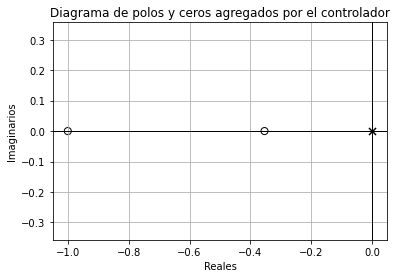

In [594]:
print ("Tu función de transferencia del controlador es: ",ft_c)
# Diagrama de polos y ceros
control.pzmap (ft_c)
plt.grid("on")
plt.xlabel("Reales")
plt.ylabel("Imaginarios")
plt.title("Diagrama de polos y ceros agregados por el controlador")

## Función de transferencia en lazo cerrado con el controlador

La función transferencia con el controlador es:  
        17.01 s^2 + 23.02 s + 6.015
-------------------------------------------
14 s^4 + 58 s^3 + 116 s^2 + 24.02 s + 6.015



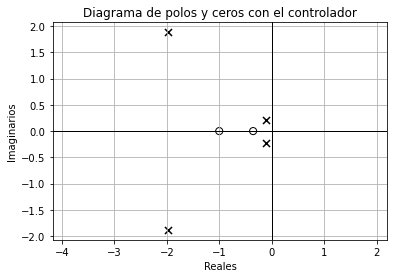

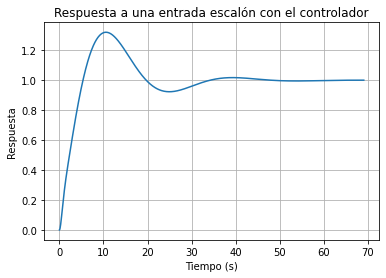

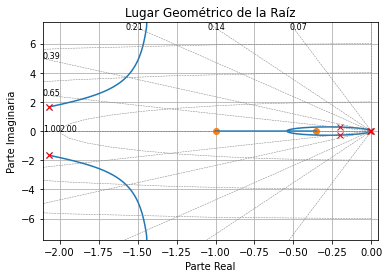

In [595]:
ft_gc = control.feedback(ft_la*ft_c)

print ("La función transferencia con el controlador es: ",ft_gc)

# Diagrama de polos y ceros
plt.figure(1)
control.pzmap (ft_gc)
plt.grid("on")
plt.xlabel("Reales")
plt.ylabel("Imaginarios")
plt.title("Diagrama de polos y ceros con el controlador")

# Respuesta a una entrada escalón
plt.figure(2)
t, y = control.step_response(ft_gc)
plt.plot(t, y)
plt.grid("on")
plt.xlabel("Tiempo (s)")
plt.ylabel("Respuesta")
plt.title("Respuesta a una entrada escalón con el controlador")

# Lugar geométrico de la raíz
plt.figure(3)
control.rlocus(ft_la*ft_c)
polos_f = control.pole(ft_la*ft_c)

polos_f = np.append(polos_f, -complex(pdd))
polos_f = np.append(polos_f, complex(-pdd.real,pdd.imag))
plt.plot(polos_f.real, polos_f.imag, "rx", label="Polos")
plt.title("Lugar Geométrico de la Raíz")
plt.xlabel("Parte Real")
plt.ylabel("Parte Imaginaria")
#plt.xlim(-0.5,0.1)
#plt.ylim (-0.5,0.5)
plt.grid(True)


